Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [s]


Sampling 2 chains for 1_000 tune and 20_000 draw iterations (2_000 + 40_000 draws total) took 33 seconds.
The acceptance probability does not match the target. It is 0.7042035773754092, but should be close to 0.8. Try to increase the number of tuning steps.


95% HD interval:  [ 81.26190692 120.13424906]
mean: 101.0027058990166 median: 100.69904466226203 std: 9.936801417363057


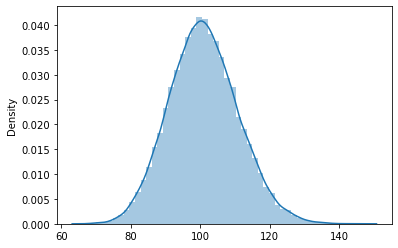

In [1]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import numpy as np

with pm.Model():
    s = pm.Uniform('s',0,10**7) # s = prior
    likelihood = pm.Poisson('likelihood',mu = s,observed=100)
    trace = pm.sample(20000)
tracee = trace['s']
a = az.hdi(tracee,hdi_prob=0.95)
b = [np.mean(tracee),np.median(tracee),np.std(tracee)]
print ('95% HD interval: ',a)
print ('mean:',b[0], 'median:',b[1],'std:',b[2])
sns.distplot(tracee)
plt.show()